In [1]:
# Библиотеки
# Реализация всех структур
import numpy as np

# Датасеты для первичной проверки качества моделей
from sklearn.datasets import make_blobs, make_circles
# classification_report
from sklearn.metrics import classification_report

# Графики и визуализация
from matplotlib import pyplot as plt

# Распаковка CIFAR-10
import pickle

# Для отображения структуры скачанных данных
import glob

# Чтобы засекать время работы алгоритма
import time

# Чтобы перезагружать библиотеку
import importlib

import sys
import os


# sys.path.append("/Users/somov-od/Documents/Teaching/DL/notebooks/Numpy Network/Numpy_NN/src")
sys.path.append(os.path.join(os.getcwd(), "src"))

from dataset.dataloader import Dataloader
from src.nn.module.sequential import Sequential
from src.nn.layers.linear import Linear
from src.nn.layers.batch_norm import BatchNorm
from src.nn.activations.relu import ReLU
from src.optimization.adam_optimizer import Adam
from src.optimization.gd_optimizer import GD
from src.nn.loss_functions.mse_loss import mse_loss
import visualization_utils as viz_utils

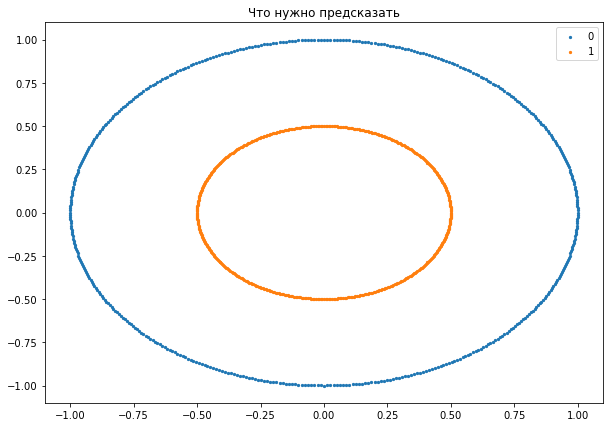

In [2]:
# Установим seed для воспроизводимости
np.random.seed(42)
dataset = make_circles(1000, factor=0.5, random_state=42)

X = dataset[0]
y = dataset[1]

plt.figure(figsize=(10, 7))

colors = ('tab:blue', 'tab:orange')

for ind, cls in enumerate(sorted(set(y))):
    plt.scatter(X[y == cls][:, 0], X[y == cls][:, 1], s=5, 
                label=str(cls), c=colors[ind])

plt.title('Что нужно предсказать')
plt.legend()
plt.show()

In [3]:
X

array([[ 0.48269082,  0.13042075],
       [-0.49334297,  0.08131858],
       [-0.49605735,  0.06266662],
       ...,
       [-0.09369066, -0.49114363],
       [ 0.68454711, -0.72896863],
       [ 0.28501926,  0.95852179]])

In [4]:
y[y==1].shape

(500,)

[[-0.6075477  -0.12613641 -0.68460636  0.92871475 -1.84440103 -0.46700242
   2.29249034  0.48881005  0.71026699  1.05553444  0.0540731   0.25795342
   0.58828165  0.88524424 -1.01700702 -0.13369303 -0.4381855   0.49344349
  -0.19900912 -1.27498361]
 [ 0.29349415  0.10895031  0.03172679  1.27263986  1.0714479   0.41581801
   1.55067923 -0.31137892 -1.37923991  1.37140879  0.02771165 -0.32039958
  -0.84617041 -0.43342892 -1.3370345   0.20917217 -1.4243213  -0.55347685
   0.07479864 -0.50561983]]
0.6411687859688489
0.5700637856977997
0.5153934468335847
0.4816855714201645
0.4616012506052779
0.452524117714652
0.4434780461898822
0.434480469477622
0.42535248391947333
0.4158317147621783
0.40560886698181864
0.39475766179083943
0.38286589018953987
0.3683423823349711
0.350651827549994
0.33152333557458113
0.31515504737887046
0.305027729327335
0.3010995788485113
0.2994295336886805
0.2953122397894463
0.28730602837993136
0.27654180761165115
0.2649284014775612
0.2537377226966429
0.2434917168637555
0.2

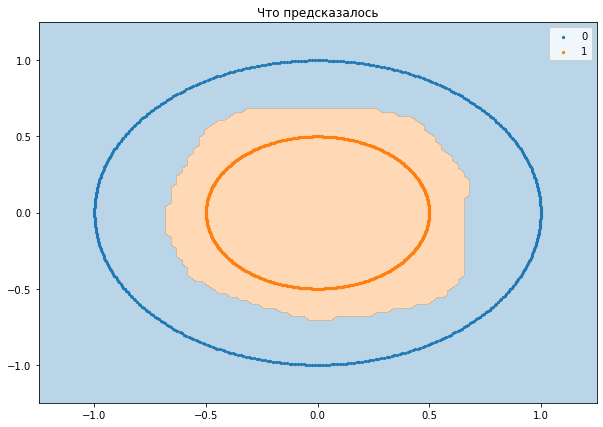

In [6]:
np.random.seed(40)
dataset = make_circles(1000, factor=0.5, random_state=42)

X = dataset[0]
y = dataset[1]

model = Sequential(
    Linear(2, 20),
    ReLU(),
    Linear(20, 10),
    ReLU(),
    Linear(10, 4),
    ReLU(),
    Linear(4, 1)
)
print(model.modules[0].W.params)
optimizer = Adam(model.parameters(), 0.01)

for epoch in range(100):
    out = model.forward(X)

    loss = mse_loss(out, y.reshape((-1, 1)))
    print(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

viz_utils.visualize_cls_preds(X, model)

In [7]:
x = X[0]
x

array([0.48269082, 0.13042075])

In [8]:
model.modules[0].W.params

array([[-0.60839203, -0.11550044, -0.75117828,  1.02015498, -1.63559777,
        -0.56013003,  2.24171456,  0.54361371,  0.76104422,  0.92956468,
        -0.03441824,  0.32916735,  0.27480666,  0.73552005, -0.85154973,
        -0.32093507, -0.62297034,  0.21397346, -0.06414769, -1.30470203],
       [ 0.2952344 ,  0.11427695,  0.18197483,  1.33064886,  1.24105088,
         0.38247376,  1.41658089, -0.19223729, -1.50127649,  1.33607334,
        -0.06341664, -0.41477146, -0.5852861 , -0.32035537, -1.22593762,
        -0.19864915, -1.06753242, -0.36954527, -0.06853382, -0.49199951]])

In [9]:
model.forward(X)

[[1.01513042]
 [1.01776952]
 [1.01967302]
 [1.02676182]
 [0.06310811]
 [1.01858977]
 [0.95986225]
 [1.00740099]
 [1.00271158]
 [0.06310811]
 [1.04961615]
 [0.06310811]
 [0.96501012]
 [0.99345951]
 [1.01847735]
 [0.99504805]
 [0.06310811]
 [0.97609903]
 [0.97998363]
 [0.06310811]
 [0.98926555]
 [0.06310811]
 [0.06310811]
 [0.99831817]
 [0.06310811]
 [0.06310811]
 [0.06310811]
 [0.978531  ]
 [0.99149999]
 [1.01098879]
 [0.06310811]
 [0.06310811]
 [0.96460058]
 [0.06310811]
 [0.06310811]
 [0.06310811]
 [1.03628326]
 [1.02592016]
 [0.99254968]
 [0.06310811]
 [0.06310811]
 [0.06310811]
 [0.06310811]
 [0.99232727]
 [0.06310811]
 [0.06310811]
 [1.00218257]
 [1.00467507]
 [0.07291568]
 [0.98115358]
 [1.0121691 ]
 [0.97567513]
 [0.06310811]
 [1.03746422]
 [0.06310811]
 [0.06310811]
 [0.97188933]
 [0.06310811]
 [0.06310811]
 [1.03254743]
 [0.06310811]
 [0.06310811]
 [0.98726548]
 [0.06310811]
 [0.99972002]
 [1.05169295]
 [1.02315433]
 [0.99284021]
 [0.06310811]
 [0.98764719]
 [0.06310811]
 [0.06